# Introduction: 
### Cet ensemble de donn√©es est con√ßu pour aider les chercheurs et les data scientists √† pr√©dire le rendement des cultures en fonction des facteurs agricoles cl√©s. Il contient des colonnes repr√©sentant la quantit√© d'engrais utilis√©e, la temp√©rature et les nutriments du sol (azote, phosphore et potassium), ainsi que le rendement des cultures correspondant.

### Cet ensemble de donn√©es peut √™tre utilis√© pour des projets d'apprentissage automatique ax√©s sur l'optimisation agricole, la pr√©vision des rendements et la gestion des ressources. 

### Les donn√©es sont structur√©es et pr√™tes √† l'analyse, ce qui les rend id√©ales pour l'entra√Ænement de mod√®les de r√©gression  ou l'analyse exploratoire des donn√©es.

## Probl√©matique : Pr√©vision du rendement des cultures √† l'aide du sol et de la m√©t√©o

## Importation des biblioth√®ques et du DataSet


In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pickle
import joblib
print("Biblioth√®ques import√©es")

Biblioth√®ques import√©es


In [233]:
df = pd.read_csv('dataset.csv')
print("Dataset import√©")

Dataset import√©


## Analyses Exploratoires 

### L'affichage des pr√©mi√®res lignes 

In [234]:
print(df.head())

   Fertilizer  temp     N     P     K  yeild
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        80.0  28.0  80.0  24.0  20.0   12.0
4        78.0  27.0  78.0  23.0  19.0   12.0


### Renomination des noms de colonnes 

In [235]:
df.rename(columns ={ 
    "Fertilizer" : " Engrais",
    "temp" : "Temperature",
    "N" : "Azote",
    "P" : "Phosphore",
    "K" : "Potassium",
    "yeild" : "Rendement"
}, inplace = True )

In [236]:
df

Engrais  Temperature      Azote  Phosphore  Potassium  Rendement
0     80.000000    28.000000  80.000000  24.000000  20.000000  12.000000
1     77.000000    27.000000  78.000000  23.000000  20.000000  12.000000
2     80.000000    26.000000  80.000000  24.000000  20.000000  12.000000
3     80.000000    28.000000  80.000000  24.000000  20.000000  12.000000
4     78.000000    27.000000  78.000000  23.000000  19.000000  12.000000
...         ...          ...        ...        ...        ...        ...
2591  78.942684    27.014634  76.838312  23.087606  20.044206  10.348503
2592  79.077362    27.153127  76.927657  23.068234  20.155436  10.528122
2593  78.986271    28.108948  77.164352  22.863654  20.989871  10.564205
2594  78.894767    28.141344  76.925149  23.071553  20.873662  10.442511
2595  79.050307    26.980865  77.124758  23.050197  19.960695  10.584638

[2596 rows x 6 columns]

In [237]:
df.shape

(2596, 6)

In [238]:
df.describe()

Engrais  Temperature        Azote    Phosphore    Potassium  \
count  2596.000000  2596.000000  2596.000000  2596.000000  2596.000000   
mean     66.487433    33.848237    69.522900    20.708194    17.806268   
std       9.747669     5.371279     6.802806     1.973419     1.940037   
min      49.751436    23.771310    58.839466    17.723223    14.704883   
25%      59.865423    28.000000    64.834635    18.988224    15.975932   
50%      65.011969    36.965121    69.894076    20.889579    18.061975   
75%      76.943112    38.928914    76.845919    22.125618    19.133858   
max      80.223893    40.272480    80.218705    25.162178    22.064666   

         Rendement  
count  2596.000000  
mean      8.533832  
std       1.938789  
min       5.150745  
25%       6.929404  
50%       8.501720  
75%      10.045179  
max      12.337651

In [239]:
# V√©rification des valeurs manquantes
df.isnull().sum()

 Engrais       0
Temperature    0
Azote          0
Phosphore      0
Potassium      0
Rendement      0
dtype: int64

In [240]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2596 entries, 0 to 2595
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    Engrais     2596 non-null   float64
 1   Temperature  2596 non-null   float64
 2   Azote        2596 non-null   float64
 3   Phosphore    2596 non-null   float64
 4   Potassium    2596 non-null   float64
 5   Rendement    2596 non-null   float64
dtypes: float64(6)
memory usage: 121.8 KB
None


## V√©rification de la corr√©lations

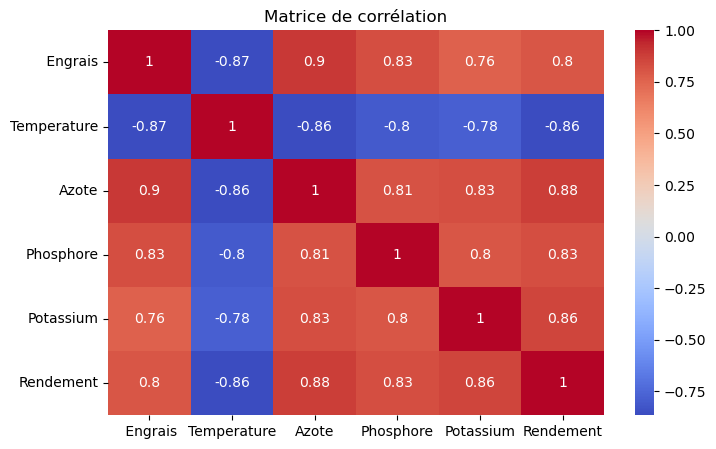

In [241]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corr√©lation")
plt.savefig('Matrice_corr√©lation', dpi=300, bbox_inches ='tight')
plt.show()

## Distribution du rendement

#### 1. Entre l'engrais(Fertilizer) et l'azote(N)  
Nous remarquons une tr√®s forte corr√©lation entre l'engrais et l'azote donc plus il y'a d'engrais 
plus il y'a d'azote.
#### 2. Entre l'engrais et le phosphore(P)
Nous remarquons une bonne corr√©lation positive entre l'engrais et le phosphore donc plus il y'a d'engrais
plus il y'a du phosphore
#### 3. Entre l'engrais et le rendement(yeild)
Il y'a une bonne corr√©lation positive entre ces deux variables ce qui veut dire que plus
il y'a de l'engrais plus il il y'a du rendement 
#### 4. Entre la temp√©rature et le rendement 
Il y'a une une forte corr√©lation n√©gative entre la temp√©rature et le rendement ce qui veut dire
que plus la temp√©reture est √©lev√©e moins il y'a de rendement.
#### 5. Entre le rendement et les composantes N, P, K
Le rendement est fortement d√©pendant de ses tois composantes et les liaisons sont respectivement de 0.88, 0.83 et de 0.86
#### 6. Entre la temp√©rature et les composantes N, P, K
Les corr√©lations entre la temp√©rature et les composantes du sol sont n√©gatives donc l'augmentation de la temp√©rature fait baiss√© le taux de nutriments dans le sol.

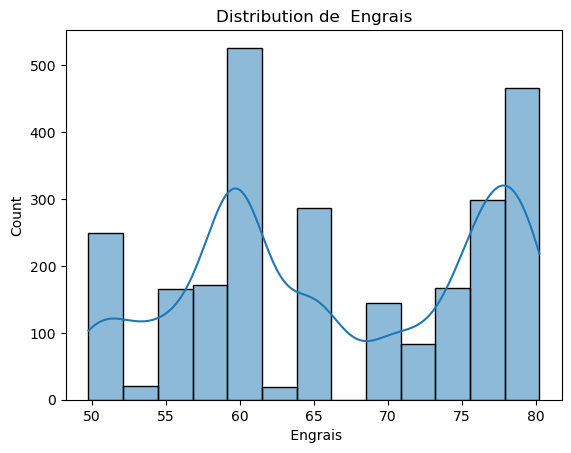

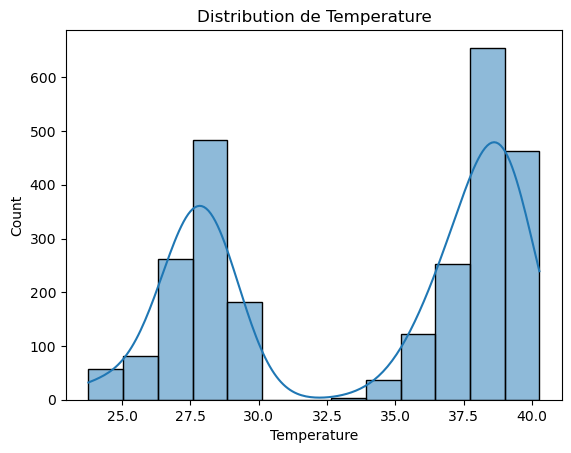

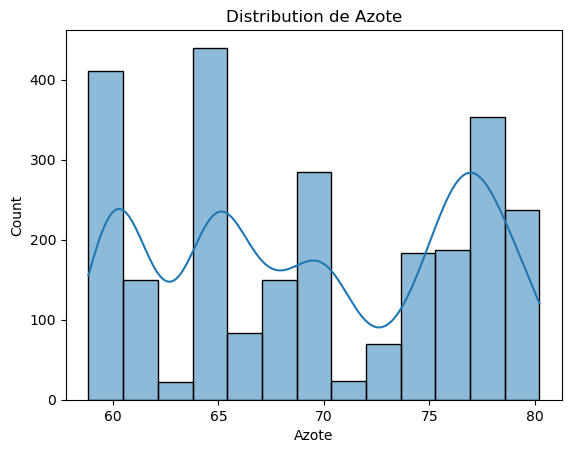

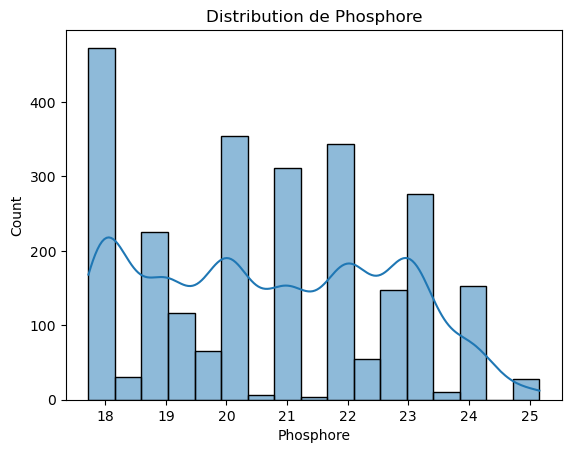

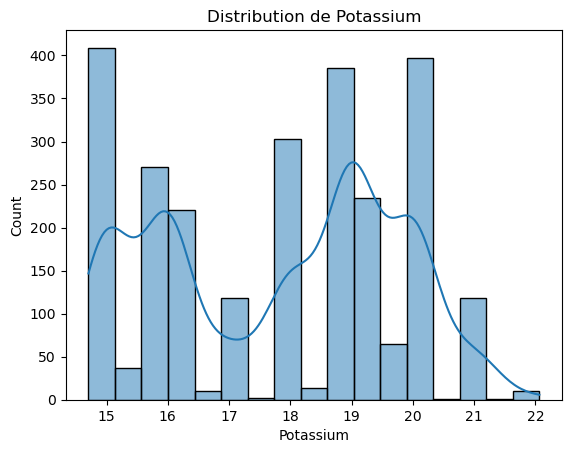

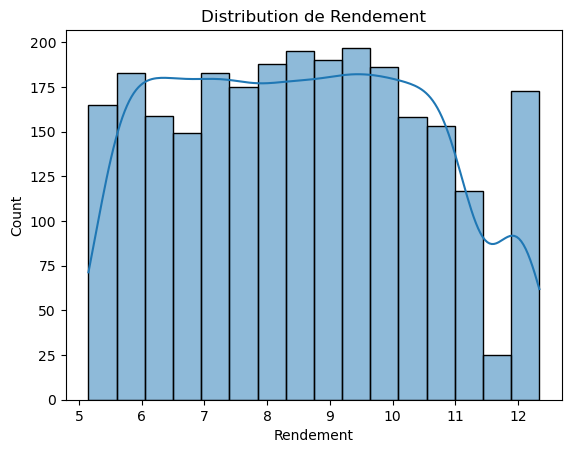

In [242]:
for col in df.select_dtypes(include='number').columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()



## Pr√©paration des donn√©es

In [243]:
# S√©paration des features et de la target
X = df.drop('Rendement', axis=1)
y = df['Rendement']

# Normalisation des donn√©es
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

### 1. Model Random Forest

In [245]:
def random_forest_prediction(X_train, X_test, y_train, y_test):
    rf_model = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        max_depth=10,
        min_samples_split=5
    )
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    return rf_model, y_pred

rf_model, y_pred_rf = random_forest_prediction(X_train, X_test, y_train, y_test)

### 2. Model gradient boosting

In [246]:
def gradient_boosting_prediction(X_train, X_test, y_train, y_test):
    gb_model = GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    gb_model.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    
    return gb_model, y_pred

gb_model, y_pred_gb = gradient_boosting_prediction(X_train, X_test, y_train, y_test)

### 3. Regression lin√©aire

In [247]:
def linear_regression_prediction(X_train, X_test, y_train, y_test):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    
    return lr_model, y_pred

lr_model, y_pred_lr = linear_regression_prediction(X_train, X_test, y_train, y_test)

### 4. Evaluation des mod√®les 

In [248]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n=== {model_name} ===")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R¬≤: {r2:.4f}")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R¬≤': r2}

# √âvaluation des diff√©rents mod√®les
results = {}
results['Random Forest'] = evaluate_model(y_test, y_pred_rf, 'Random Forest')
results['Gradient Boosting'] = evaluate_model(y_test, y_pred_gb, 'Gradient Boosting')
results['Linear Regression'] = evaluate_model(y_test, y_pred_lr, 'Linear Regression')


=== Random Forest ===
MAE: 0.1247
MSE: 0.0372
RMSE: 0.1929
R¬≤: 0.9901

=== Gradient Boosting ===
MAE: 0.2008
MSE: 0.0786
RMSE: 0.2803
R¬≤: 0.9791

=== Linear Regression ===
MAE: 0.5791
MSE: 0.5162
RMSE: 0.7185
R¬≤: 0.8626


### 5. Visualisation du mod√®le Random forest

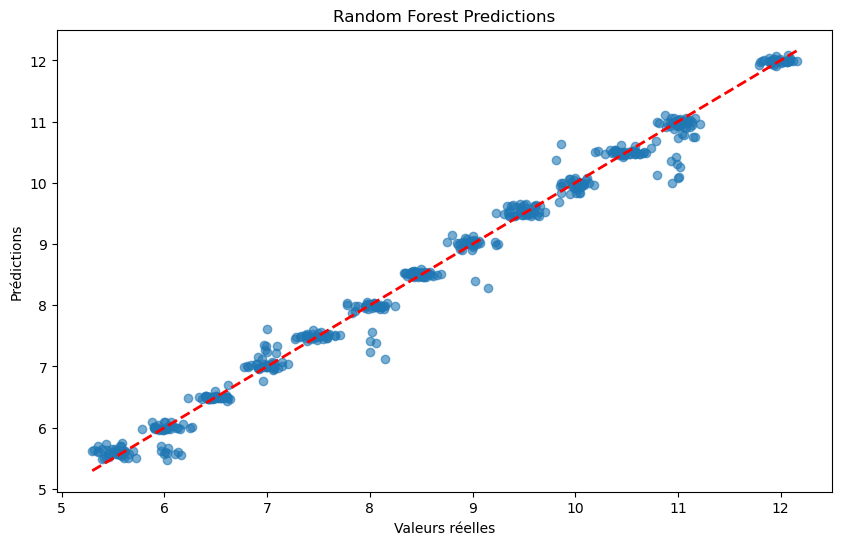

In [249]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Valeurs r√©elles')
    plt.ylabel('Pr√©dictions')
    plt.title(title)
    plt.show()

# Visualiser les pr√©dictions du meilleur mod√®le
plot_predictions(y_test, y_pred_rf, 'Random Forest Predictions')

### Exemple d'utilisation 

In [251]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# 1. Cr√©er et entra√Æner le scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Cr√©er et entra√Æner le mod√®le
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 3. D√©finir la fonction de pr√©diction
def predict_rendement(Engrais, temperature, Azote, Phosphore, Potassium, model=rf_model, scaler=scaler):
    """
    Pr√©dit le rendement bas√© sur les param√®tres d'entr√©e
    """
    import pandas as pd
    # Cr√©er un DataFrame avec les colonnes attendues
    input_data = pd.DataFrame([{
        "Engrais": Engrais,
        "temperature": temperature,
        "Azote": Azote,
        "Phosphore": Phosphore,
        "Potassium": Potassium
    }])

    # Appliquer le scaler
    input_scaled = scaler.transform(input_data.values)

    # Faire la pr√©diction
    prediction = model.predict(input_scaled)
    return prediction[0]

#Exemple d‚Äôutilisation :
predict_rendement(Engrais=120, temperature=25, Azote=50, Phosphore=30, Potassium=20)


8.17278140086737

### Visualisation de l'importance des variables dans la pr√©diction du rendement

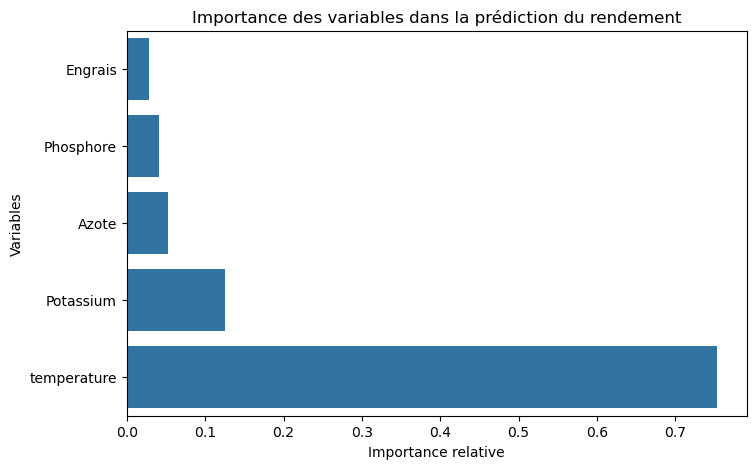

In [252]:
# 1. R√©cup√©rer l‚Äôimportance des variables
importances = rf_model.feature_importances_

# 2. Mettre en DataFrame
df_importances = pd.DataFrame({
    "Variable": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=True)

# 3. Visualisation avec seaborn
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Variable", data=df_importances, orient="h")
plt.title("Importance des variables dans la pr√©diction du rendement")
plt.xlabel("Importance relative")
plt.ylabel("Variables")
plt.show()


### R√©alisation de script

In [253]:
def save_model(model, scaler, filename='rendement_prediction_model.pkl'):
    model_data = {
        'model': model,
        'scaler': scaler,
        'feature_names': ['Engrais', 'Temperature', 'Azote', 'Phosphore', 'Potassium']
    }
    joblib.dump(model_data, filename)
    print(f"‚úÖ Mod√®le sauvegard√© sous {filename}")

def load_model(filename='rendement_prediction_model.pkl'):
    model_data = joblib.load(filename)
    print(f"üìÇ Mod√®le charg√© depuis {filename}")
    return model_data

# Sauvegarder le mod√®le
save_model(rf_model, scaler)

# Charger le mod√®le
loaded_data = load_model()
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']
loaded_features = loaded_data['feature_names']

# Exemple de pr√©diction avec le mod√®le charg√©

def predict_with_loaded(Engrais, Temperature, Azote, Phosphore, Potassium, model=loaded_model, scaler=loaded_scaler, features=loaded_features):
    input_data = pd.DataFrame([[Engrais, Temperature, Azote, Phosphore, Potassium]], columns=features)
    input_scaled = scaler.transform(input_data.values)
    prediction = model.predict(input_scaled)
    return prediction[0]

print("üå± Pr√©diction :", predict_with_loaded(120, 25, 50, 30, 20))

‚úÖ Mod√®le sauvegard√© sous rendement_prediction_model.pkl
üìÇ Mod√®le charg√© depuis rendement_prediction_model.pkl
üå± Pr√©diction : 8.17278140086737


## Conclusion 

- Le mod√®le **Random Forest** surpasse la r√©gression lin√©aire en performance (R¬≤ plus √©lev√©, RMSE plus faible).
- L'**importance des variables** indique que la **temp√©rature** est le facteur dominant, suivie de **Potassium**, puis **Azote** et **Phosphore**.

Ce projet a permis de d√©montrer l‚Äôimportance de l‚Äôexploitation des donn√©es agricoles dans l‚Äôoptimisation de la production. √Ä partir d‚Äôun jeu de donn√©es int√©grant des variables cl√©s telles que l‚Äôapport en engrais, la temp√©rature et la composition du sol (azote, phosphore et potassium), nous avons pu appliquer diff√©rentes techniques d‚Äôapprentissage automatique afin de pr√©dire le rendement des cultures.

L‚Äôanalyse exploratoire a confirm√© la pertinence de ces variables en tant que facteurs explicatifs de la productivit√©. L‚Äôexp√©rimentation de plusieurs mod√®les de r√©gression, notamment la r√©gression lin√©aire, le Random Forest et le Gradient Boosting, a mis en √©vidence la sup√©riorit√© des m√©thodes d‚Äôensemble par rapport aux approches lin√©aires classiques, gr√¢ce √† leur meilleure capacit√© de g√©n√©ralisation et leur robustesse face aux donn√©es bruit√©es.

Ces r√©sultats confirment l‚Äôapport significatif des approches bas√©es sur l‚Äôintelligence artificielle dans le domaine agricole. En automatisant la pr√©vision des rendements, elles constituent un outil strat√©gique pour soutenir la prise de d√©cision des agriculteurs, optimiser l‚Äôusage des ressources (engrais, eau, √©nergie) et contribuer √† une agriculture durable.

Cependant, ce travail pr√©sente certaines limites, notamment la taille restreinte et la sp√©cificit√© du jeu de donn√©es utilis√©. Pour accro√Ætre la fiabilit√© des pr√©dictions, il serait pertinent d‚Äô√©largir la base de donn√©es √† des contextes p√©doclimatiques plus vari√©s, d‚Äôint√©grer d‚Äôautres facteurs d√©terminants (pluviom√©trie, humidit√© du sol, vari√©t√©s de semences) et d‚Äôexplorer des mod√®les plus avanc√©s tels que les r√©seaux de neurones profonds.

En perspective, l‚Äôint√©gration de ces approches pr√©dictives dans des syst√®mes d√©cisionnels intelligents pourrait offrir aux exploitants agricoles un outil op√©rationnel d‚Äôaide √† la planification, contribuant ainsi √† relever les d√©fis li√©s √† la s√©curit√© alimentaire et au changement climatique.